In [13]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
import seaborn as sns
import pickle
df = pd.read_csv("heart_2020_cleaned.csv")
df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


<AxesSubplot:>

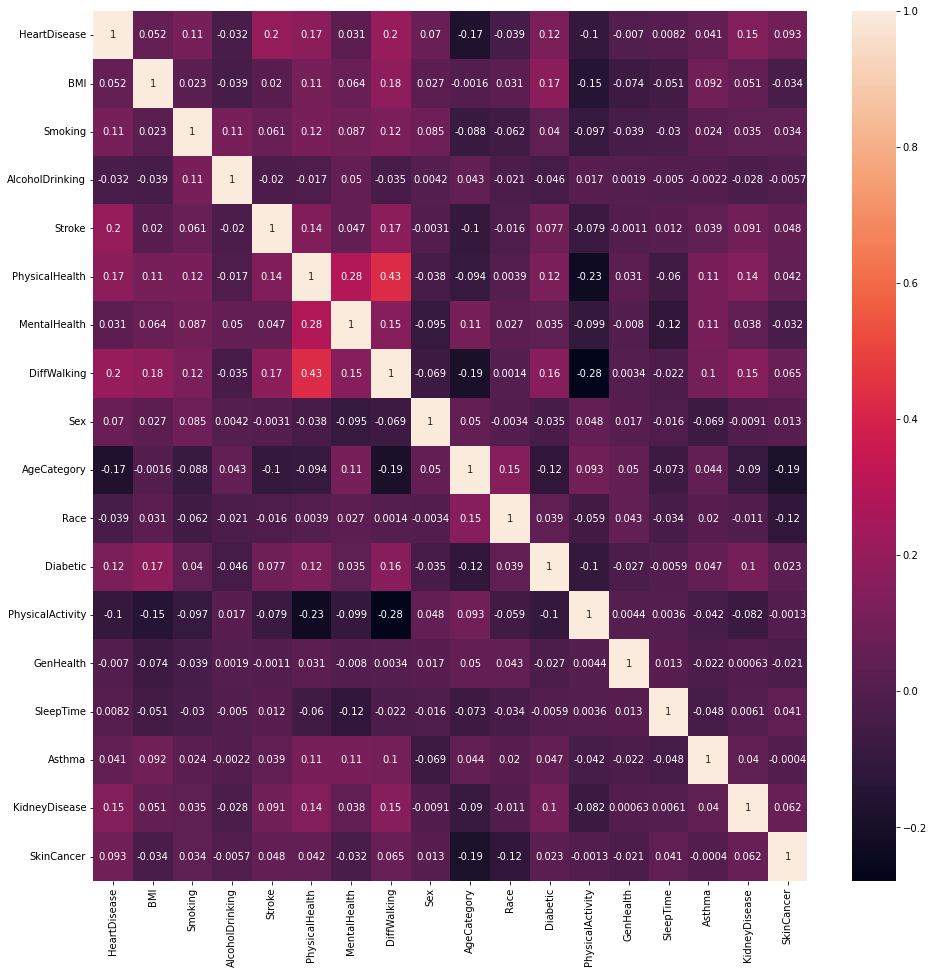

In [14]:
df = df.replace(df["Diabetic"].unique(),list(range(0,len(df["Diabetic"].unique()))))
df = df.replace(df["HeartDisease"].unique(),[0,1])
df = df.replace(df["Sex"].unique(),[0,1])
df = df.replace(df["Race"].unique(),list(range(0,len(df["Race"].unique()))))
df = df.replace(df["GenHealth"].unique(),list(range(0,len(df["GenHealth"].unique()))))
df = df.replace(df["AgeCategory"].unique(),list(range(0,len(df["AgeCategory"].unique()))))
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True)

In [15]:
X = df.drop(["HeartDisease"],axis=1)
y1=df["HeartDisease"]
X1_train,X1_test,y1_train,y1_test=train_test_split(X,y1,test_size=0.2,random_state=101)
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,0,0,1,1,0,5.0,1,0,1
1,20.34,0,0,1,1.0,1.0,0,0,1,0,0,1,0,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,2,0,1,1,1,8.0,1,0,0
3,24.21,0,0,0,1.0,1.0,0,0,3,0,0,0,2,6.0,0,0,1
4,23.71,0,0,0,28.0,1.0,1,0,4,0,0,1,0,8.0,0,0,0


In [16]:
def Fun_Model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    pre = model.predict(X_test)
    MAE= mean_absolute_error(y_test,pre)
    MSE = mean_squared_error(y_test,pre)
    RMSE = np.sqrt(MSE)
    print(f"MAE is {MAE}")
    print(f"MSE is {MSE}")
    print(f"RMSE is {RMSE}")

Linear

In [17]:
l_model=LinearRegression() 
Fun_Model(l_model,X1_train,y1_train,X1_test,y1_test)

MAE is 0.14556165853617198
MSE is 0.07026442003801092
RMSE is 0.26507436699539794


Polynomial

In [18]:
poly_coverter = PolynomialFeatures(degree =3,include_bias=False)
poly_features = poly_coverter.fit_transform(X)
X1_train,X1_test,y1_train,y1_test=train_test_split(poly_features,y1,test_size=0.2,random_state=101)
poly_model=LinearRegression() 
Fun_Model(poly_model,X1_train,y1_train,X1_test,y1_test)
print("")


MAE is 0.13813196460736082
MSE is 0.06834355359005864
RMSE is 0.2614260002181471



Logistic

In [19]:
scaler = StandardScaler()
s_X_train = scaler.fit_transform(X1_train)
s_X_test = scaler.transform(X1_test)
model = LogisticRegression()
model.fit(s_X_train,y1_train)
pred = model.predict(s_X_test)
accuracy_score(y1_test,pred)

C:\Users\Dev Mehta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9139605059491237

KNN

In [20]:
# scaler = StandardScaler()
# s_X_train = scaler.fit_transform(X1_train)
# s_X_test = scaler.transform(X1_test)
# knn_model = KNeighborsClassifier(n_neighbors=5)
# knn_model.fit(s_X_train,y1_train)
# pred = knn_model.predict(s_X_test)
# accuracy_score(y1_test,pred)

Random Forest

In [21]:
# rf = RandomForestClassifier(n_estimators=100, random_state=0)
# rf.fit(X1_train, y1_train)
# pred = rf.predict(X1_test)
# MAE= mean_absolute_error(y1_test,pred)
# MSE = mean_squared_error(y1_test,pred)
# RMSE = np.sqrt(MSE)
# print(f"MAE is {MAE}")
# print(f"MSE is {MSE}")
# print(f"RMSE is {RMSE}")

In [22]:
pickle_out = open("model.pkl", "wb")
pickle.dump(l_model, pickle_out)
pickle_out.close()